# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


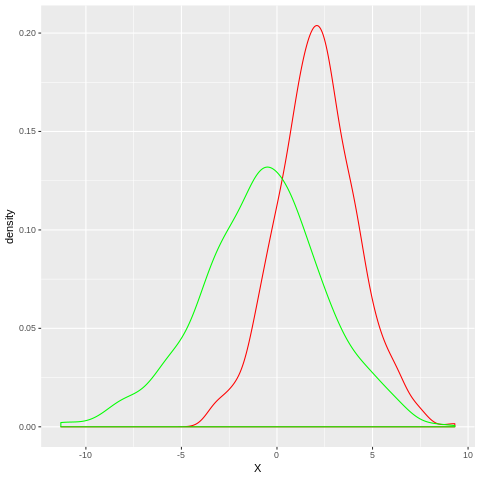

In [60]:
%%R
# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!
new_df <- dat %>% mutate(label = parse_factor(label, NULL))

new_df_1 <- filter(new_df, label == 1)
new_df_2 <- filter(new_df, label == 0)

ggplot(new_df_1, aes(X)) +
  geom_density(data=new_df_2, color = "red")+
  geom_density(data=new_df_1, color = "green")




# Problem 2: Using Classes in Python

In [63]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [64]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [76]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
import random
X = random.shuffle(dat)


In [77]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [79]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train = dat[:699]
test = dat[700:]

In [81]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

# THIS is how far i got
train_x = train[1]
test_x = test[1]

[[0.4793106992178875, 0], [-3.2145968511150924, 0], [1.3756418149314498, 0], [0.4488950146741837, 1], [4.605299116449604, 0], [-0.17059482823862737, 0], [-0.5744990867347419, 0], [-1.409802597431057, 1], [-2.086813662757523, 1], [1.6876002946126785, 1], [-3.753242181870463, 1], [-1.3751297761001913, 1], [1.160790199200993, 0], [-2.6498703707394133, 1], [-3.345400250911834, 1], [4.406163099607436, 1], [4.309891390817572, 0], [1.9203409843761932, 0], [-4.3476670076319, 1], [0.13270701956526643, 1], [5.424689225722013, 0], [-7.983835199216159, 1], [1.6696404262511093, 0], [3.092456915960364, 0], [0.4423724749681446, 1], [2.4575737463101452, 0], [-9.763935077276724, 1], [-2.563432621134047, 0], [2.8885859611647744, 0], [-5.067198663064087, 1], [-3.133182949404637, 1], [0.4607719018897578, 0], [1.9649288414206927, 0], [2.452921070268159, 1], [1.7009194360824087, 1], [-5.646534489456365, 1], [-0.17296267405218624, 1], [1.7009057483560346, 0], [-6.264856352595013, 1], [4.792327327745093, 1], 

## Problem 2.3: Testing models!

In [124]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label



In [ ]:
# Compare the two classes of models!